In [70]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings 
#We do not want to see warnings
warnings.filterwarnings("ignore") 


In [71]:
df=pd.read_csv("uber.csv")


In [72]:
df.head()


,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [73]:
df.shape


(200000, 9)

In [74]:
df.drop(columns=['Unnamed: 0','key'],axis=1,inplace=True)


In [75]:
df.dropna(inplace=True)


In [76]:
df.shape


(199999, 7)

In [77]:
df['pickup_datetime']=pd.to_datetime(df["pickup_datetime"])


In [78]:
df['pickup_hour']=df["pickup_datetime"].dt.hour


In [79]:
df['pickup_minute']=df["pickup_datetime"].dt.minute


In [80]:
df['pickup_day']=df["pickup_datetime"].dt.dayofweek


In [81]:
df.drop(columns=['pickup_datetime'],axis=1,inplace=True)


In [82]:
df.head()


,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_hour,pickup_minute,pickup_day
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,19,52,3
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,20,4,4
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,21,45,0
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,8,22,4
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,17,47,3


In [83]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 199999 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   fare_amount        199999 non-null  float64
 1   pickup_longitude   199999 non-null  float64
 2   pickup_latitude    199999 non-null  float64
 3   dropoff_longitude  199999 non-null  float64
 4   dropoff_latitude   199999 non-null  float64
 5   passenger_count    199999 non-null  int64  
 6   pickup_hour        199999 non-null  int64  
 7   pickup_minute      199999 non-null  int64  
 8   pickup_day         199999 non-null  int64  
dtypes: float64(5), int64(4)
memory usage: 15.3 MB


In [84]:
df.corr()


,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_hour,pickup_minute,pickup_day
fare_amount,1.000000,0.010458,-0.008482,0.008986,-0.011014,0.010158,-0.021463,-0.008043,0.007508
pickup_longitude,0.010458,1.000000,-0.816461,0.833026,-0.846324,-0.000415,0.002432,0.002782,0.000825
pickup_latitude,-0.008482,-0.816461,1.000000,-0.774787,0.702367,-0.001559,-0.003821,-0.002920,-0.002454
dropoff_longitude,0.008986,0.833026,-0.774787,1.000000,-0.917010,0.000033,0.003478,0.002557,0.000001
dropoff_latitude,-0.011014,-0.846324,0.702367,-0.917010,1.000000,-0.000659,-0.002544,-0.001620,-0.002335
passenger_count,0.010158,-0.000415,-0.001559,0.000033,-0.000659,1.000000,0.013187,0.000695,0.033189
pickup_hour,-0.021463,0.002432,-0.003821,0.003478,-0.002544,0.013187,1.000000,0.001148,-0.086956
pickup_minute,-0.008043,0.002782,-0.002920,0.002557,-0.001620,0.000695,0.001148,1.000000,-0.002321
pickup_day,0.007508,0.000825,-0.002454,0.000001,-0.002335,0.033189,-0.086956,-0.002321,1.000000


In [85]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


In [108]:
#Remove Outliers
q_low = df["fare_amount"].quantile(0.01)
q_hi  = df["fare_amount"].quantile(0.99)

df = df[(df["fare_amount"] < q_hi) & (df["fare_amount"] > q_low)]


{'whiskers': [<matplotlib.lines.Line2D at 0x177652990>,
 'caps': [<matplotlib.lines.Line2D at 0x177653c50>,
 'boxes': [<matplotlib.lines.Line2D at 0x1776521d0>],
 'medians': [<matplotlib.lines.Line2D at 0x177668b90>],
 'fliers': [<matplotlib.lines.Line2D at 0x1776692d0>],
 'means': []}

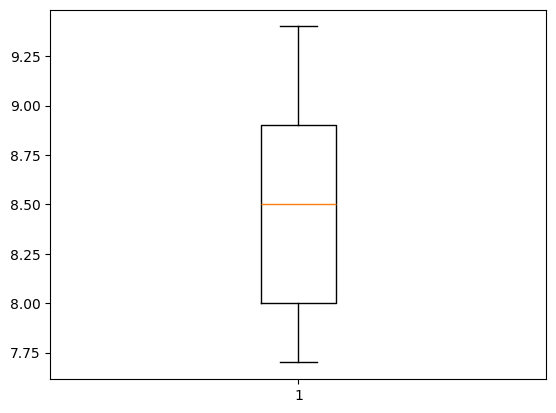

In [109]:
plt.boxplot(df['fare_amount'])


In [110]:
df.shape


(30896, 9)

In [111]:
X=df.drop(columns=['fare_amount'])
Y=df['fare_amount']


In [112]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=1)


In [113]:
lr=LinearRegression()
lr.fit(X_train,Y_train)
test_predict=lr.predict(X_test)
RMSE=np.sqrt(mean_squared_error(test_predict,Y_test))
print("RMSE: ",np.round_(RMSE,2))


RMSE:  0.51


In [114]:
r2 = r2_score(Y_test, test_predict)
print(r2)


-0.0007136240992222653


In [115]:
from sklearn.ensemble import RandomForestRegressor
rfrmodel = RandomForestRegressor(n_estimators = 100, random_state = 101)


In [116]:
rfrmodel.fit(X_train, Y_train)
rfrmodel_pred = rfrmodel.predict(X_test)


In [117]:
rfrmodel_rmse = np.sqrt(mean_squared_error(rfrmodel_pred, Y_test))
print("RMSE value for Random Forest is:",rfrmodel_rmse)


RMSE value for Random Forest is: 0.4974431909409193


In [118]:
r2_rand = r2_score(Y_test, rfrmodel_pred)
print(r2_rand)


0.03330764688770693
